<a href="https://colab.research.google.com/github/Sachinsn19/Calories-Burnt-Prediction/blob/main/Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Data Collection and Preprocessing

In [161]:
#Loading dataset into Pandas Dataframe
calories = pd.read_csv('/content/calories.csv')

In [162]:
#Printing top 5 rows of the data
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [163]:
exercise = pd.read_csv('/content/exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


### Combiniing both datasets

In [164]:
exercise_data = pd.concat([exercise, calories['Calories']], axis=1)

In [165]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [166]:
#Number of rows and columns
exercise_data.shape

(15000, 9)

In [167]:
#Getting some informations about the dataset
exercise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [168]:
#checking for missing values
exercise_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [169]:
#Getting some statistical measures of the data
exercise_data.iloc[:,1:].describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


## Data Visualization 

In [170]:
sns.set()

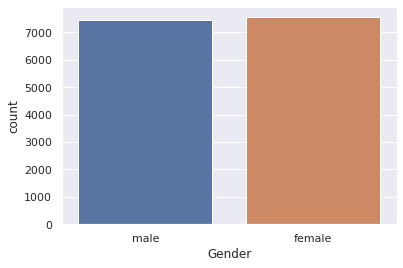

In [171]:
#Plotting Gender column
sns.countplot(exercise_data['Gender'])
plt.show()

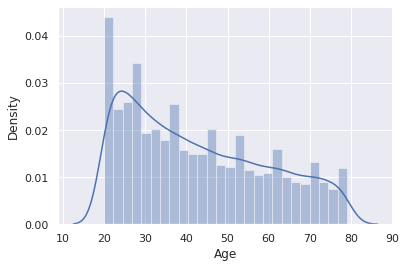

In [172]:
#Distribution of Age column
sns.distplot(exercise_data['Age'])
plt.show()

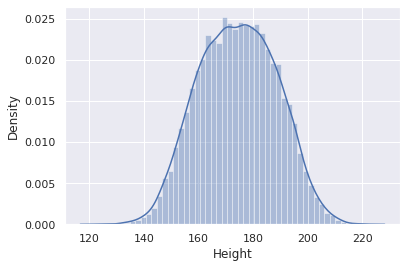

In [173]:
#Distribution of height columns
sns.distplot(exercise_data['Height'])
plt.show()

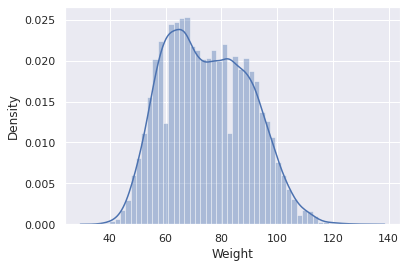

In [174]:
#Distribution of weight columns
sns.distplot(exercise_data['Weight'])
plt.show()

# Correlation


1.   Positive
2.   Negative


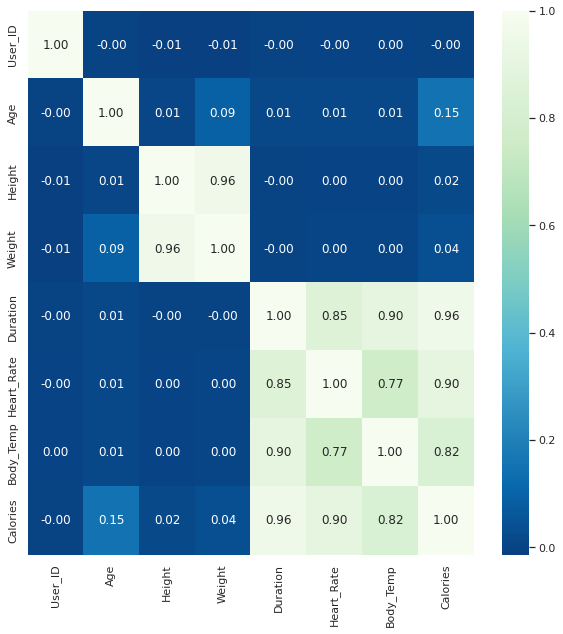

In [175]:
#Plotting heatmap for finding correlation
plot = plt.figure(figsize=(10,10))
sns.heatmap(exercise_data.corr(), cbar=True, yticklabels=True, annot=True, fmt='.2f',cmap='GnBu_r')
plt.show()

## Encoding Categorical columns

In [176]:
exercise_data.select_dtypes(include=['object']).columns

Index(['Gender'], dtype='object')

In [177]:
exercise_data['Gender'].replace({'male':0,'female':1}, inplace=True)

In [178]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


## Seperating Features and Target

In [179]:
X = exercise_data.drop(['User_ID','Calories'], axis=1).values
y = exercise_data['Calories'].values

In [180]:
print(X)
print(y)

[[  0.   68.  190.  ...  29.  105.   40.8]
 [  1.   20.  166.  ...  14.   94.   40.3]
 [  0.   69.  179.  ...   5.   88.   38.7]
 ...
 [  1.   43.  159.  ...  16.   90.   40.1]
 [  0.   78.  193.  ...   2.   84.   38.3]
 [  0.   63.  173.  ...  18.   92.   40.5]]
[231.  66.  26. ...  75.  11.  98.]


## Train Test Split

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [182]:
print(X.shape,X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


## Model Training

XGBoost Regressor

In [183]:
#Training the model with train data
model = XGBRegressor()
model.fit(X_train, y_train)

[07:15:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

## Model Evaluation

In [184]:
#Prediction on test data
test_data_prediction = model.predict(X_test)

#Mean absolute error on test data
test_data_MAE = metrics.mean_absolute_error(y_test, test_data_prediction)

print("Mean Absolute Error on Test data : ",test_data_MAE)

Mean Absolute Error on Test data :  2.7159012502233186


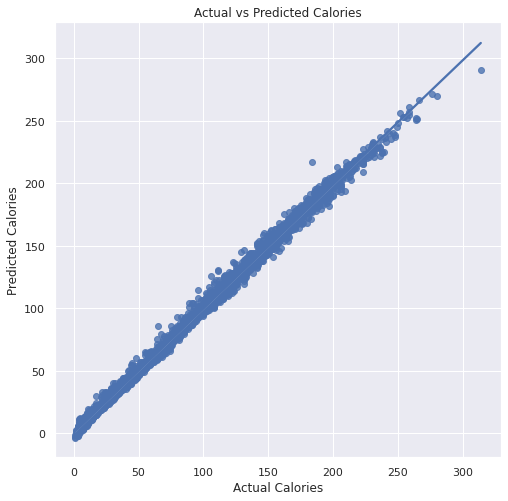

In [185]:
plot = plt.figure(figsize=(8,8))
sns.regplot(y_test, test_data_prediction )
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.show()

## Building Predictive System

In [186]:
input_data = [16180408,'female',34,179.0,71.0,13.0,100.0,40.5]
input_data.pop(0)
if input_data[0]=='female':
   input_data[0] = '1'
elif input_data[0]=='male':
  input_data[0] = '0'
else:
  print("Please enter correct gender details")

# changing input_data to a numpy array and reshaping the array
input_data_for_prediction = np.asarray(input_data).reshape(1,-1)

#Predicting calories based on input
prediction = model.predict(input_data_for_prediction)
print("Predited Calories :", prediction[0])

Predited Calories : 72.46804


# .................................THANK YOU...............................